In [9]:
import pandas as pd 

df1 = pd.read_csv('./5th_Lesson/data/turboaz.csv')

In [10]:

def applyAZN(col):
    lst = col.split()
    if 'AZN' in col:
        return float(lst[0])
    if '$' in col: 
        return float(lst[0]) * 1.7
    return 0

df1['Qiymet'] = df1['Qiymet'].apply(applyAZN)
df1['Yurush'] = df1['Yurush'].apply(lambda x: int(''.join(x.strip().replace('km', '').split())))

df = df1[['Buraxilish ili', 'Yurush', 'Qiymet']].copy()


In [11]:
df

,Buraxilish ili,Yurush,Qiymet
0,1999,366000,12500.0
1,2014,102000,53550.0
2,2002,469700,11700.0
3,1998,556680,9700.0
4,2000,300000,12700.0
...,...,...,...
1323,1996,325000,8800.0
1324,1994,280000,6300.0
1325,1998,272000,10900.0
1326,2000,207000,11300.0


In [12]:
import numpy as np 

def costFunction(X, Y, W):
    h = X.dot(W)
    J = np.sum(((h - Y) **2) / (2 * len(Y)))
    return J

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df['Buraxilish ili'] = (df['Buraxilish ili'] -df['Buraxilish ili'].mean() )/df['Buraxilish ili'].std()
df['Yurush'] = (df['Yurush'] - df['Yurush'].mean() )/df['Yurush'].std()
df['Qiymet'] = (df['Qiymet'] - df['Qiymet'].mean() )/df['Qiymet'].std()

X = df[['Buraxilish ili', 'Yurush']]
y = df['Qiymet']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)



x0 = np.ones(len(X_train))
inputs  = np.array([x0, X_train['Buraxilish ili'] , X_train['Yurush']]).T
w       = np.array([0, 0, 0])
outputs = y_train

In [15]:
costFunction(inputs, outputs, w)

0.49084025071730075

In [20]:
costHistorical = []

def gradientDescent(X, Y, W, alpha = 0.001, iteration = 10000):
    for i in range(iteration):
        h = X.dot(W)
        diff = h - Y

        g = (X.T.dot(diff))/len(Y)
        W = W - alpha * g
        costHistorical.append(costFunction(X,Y,W))
    return W

In [23]:
final_coef = gradientDescent(inputs, outputs, w)
final_coef

array([-0.00487982,  0.81707216, -0.09390129])

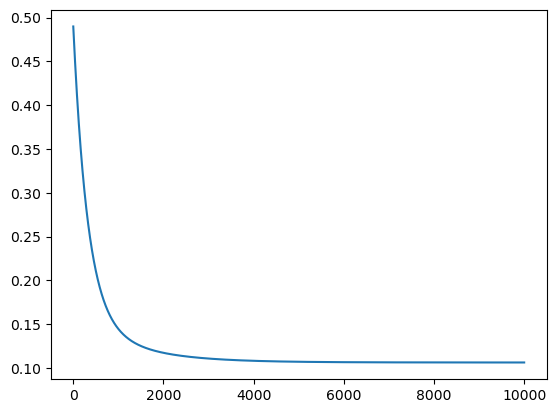

In [19]:
import matplotlib.pyplot as plt

plt.plot(costHistorical)

In [11]:
X_test['prediction'] = X_test['Buraxilish ili'] * final_coef[1] + X_test['Yurush'] * final_coef[2] + final_coef[0] * 1

In [12]:
X_test

,Buraxilish ili,Yurush,prediction
1201,-0.350117,0.669419,-0.353810
115,0.212783,-0.411624,0.207631
979,0.025150,-0.320428,0.045758
175,-0.913017,0.444646,-0.792634
63,-0.162484,0.715888,-0.204864
...,...,...,...
885,0.025150,0.317942,-0.014186
764,-0.537750,-0.378462,-0.408723
752,0.025150,0.351104,-0.017300
1270,-0.913017,0.666144,-0.813433


In [13]:
y_test = pd.DataFrame(y_test)

In [15]:
def deNormalizePrice(col):
    col = col * df1.Qiymet.std() + df1.Qiymet.mean()
    return col 

In [16]:
y_test['Qiymet'] = y_test['Qiymet'].apply(deNormalizePrice)

In [17]:
X_test['prediction'] = X_test['prediction'].apply(deNormalizePrice)

In [18]:
y_test

,Qiymet
1201,11500.0
115,12400.0
979,10500.0
175,8000.0
63,12500.0
...,...
885,12400.0
764,7900.0
752,13600.0
1270,8700.0


In [19]:
X_test

,Buraxilish ili,Yurush,prediction
1201,-0.350117,0.669419,10286.799031
115,0.212783,-0.411624,17950.708447
979,0.025150,-0.320428,15741.068754
175,-0.913017,0.444646,4296.673928
63,-0.162484,0.715888,12319.981878
...,...,...,...
885,0.025150,0.317942,14922.810569
764,-0.537750,-0.378462,9537.218864
752,0.025150,0.351104,14880.303650
1270,-0.913017,0.666144,4012.759591


In [23]:
df

,Buraxilish ili,Yurush,Qiymet
0,-0.162484,0.715888,-0.191676
1,2.652017,-1.472811,2.815558
2,0.400416,1.575615,-0.250282
3,-0.350117,2.296725,-0.396798
4,0.025150,0.168713,-0.177024
...,...,...,...
1323,-0.725384,0.375976,-0.462730
1324,-1.100651,0.002902,-0.645874
1325,-0.350117,-0.063422,-0.308888
1326,0.025150,-0.602306,-0.279585


In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
model.predict(X_test.drop('prediction', axis = 1))

KeyError: "['prediction'] not found in axis"

In [40]:
X_test

,Buraxilish ili,Yurush,prediction
1201,-0.350117,0.669419,10286.799031
115,0.212783,-0.411624,17950.708447
979,0.025150,-0.320428,15741.068754
175,-0.913017,0.444646,4296.673928
63,-0.162484,0.715888,12319.981878
...,...,...,...
885,0.025150,0.317942,14922.810569
764,-0.537750,-0.378462,9537.218864
752,0.025150,0.351104,14880.303650
1270,-0.913017,0.666144,4012.759591


In [42]:
model.predict([[-0.350117, 0.669419	]])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.35215919])

In [41]:
df1.loc[1201]

Sheher                                                           Bakı
Marka                                                        Mercedes
Model                                                           C 180
Buraxilish ili                                                   1998
Ban novu                                                    Universal
Reng                                                            Yaşıl
Muherrikin hecmi                                                1.8 L
Muherrikin gucu                                              122 a.g.
Yanacaq novu                                                   Benzin
Yurush                                                         360395
Suretler qutusu                                              Mexaniki
Oturucu                                                          Arxa
Yeni                                                             Xeyr
Qiymet                                                        11500.0
Extra Info          

In [43]:
-0.35215919 * df1.Qiymet.std()+ df1.Qiymet.mean()

10309.33402899674

In [44]:
X_test

,Buraxilish ili,Yurush,prediction
1201,-0.350117,0.669419,10286.799031
115,0.212783,-0.411624,17950.708447
979,0.025150,-0.320428,15741.068754
175,-0.913017,0.444646,4296.673928
63,-0.162484,0.715888,12319.981878
...,...,...,...
885,0.025150,0.317942,14922.810569
764,-0.537750,-0.378462,9537.218864
752,0.025150,0.351104,14880.303650
1270,-0.913017,0.666144,4012.759591
